In [20]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("./DATASET/flooding.csv")
df.head()

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,category,label
0,0.000,39,9999,0.0,1.0,0.455915,0.453760,0.651939,0.602542,0.455513,0.453217,0.647481,1.000000,0.0,0.0,0.505311,Flooding,1
1,0.029,39,9999,0.0,1.0,0.546376,0.451854,0.562410,0.574839,0.546240,0.451169,0.639066,0.417750,0.0,0.0,0.602969,Normal,0
2,0.031,39,9999,0.0,1.0,0.477600,0.643320,0.590334,0.550347,0.477600,0.644056,0.495172,0.601483,0.0,0.0,0.672366,Normal,0
3,0.043,39,9999,0.0,1.0,0.449653,0.635719,0.587023,0.513923,0.449515,0.636046,0.452128,0.558999,0.0,0.0,0.666124,Normal,0
4,0.045,39,9999,0.0,1.0,0.554547,0.580181,0.440554,0.520545,0.554830,0.580524,0.422353,0.513192,0.0,0.0,0.698465,Normal,0


In [22]:
df.describe()

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,label
count,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000,398782.000000
mean,482.829120,31.627436,5652.387956,0.356498,0.494947,0.444354,0.454097,0.445333,0.455545,0.444649,0.454265,0.505977,0.629231,0.210379,0.161809,0.182791,0.339975
std,519.178377,18.195168,4945.065750,0.291830,0.435345,0.203726,0.191579,0.205766,0.194507,0.203936,0.191707,0.118305,0.252657,0.284941,0.271924,0.272279,0.473701
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.031000,19.000000,27.000000,0.000000,0.000000,0.426945,0.439832,0.435098,0.435281,0.427266,0.439978,0.435817,0.435061,0.000000,0.000000,0.000000,0.000000
50%,322.358500,30.000000,9999.000000,0.463944,0.520298,0.497828,0.499638,0.499879,0.500121,0.498070,0.499517,0.500121,0.535281,0.000000,0.000000,0.000000,0.000000
75%,583.105250,41.000000,9999.000000,0.580867,1.000000,0.561495,0.564334,0.564787,0.565090,0.566004,0.564183,0.565090,1.000000,0.546511,0.548556,0.505311,1.000000
max,4819.550000,101.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
col_discrete = ['source', 'destination', 'length', 'info', 'dao', 'dis', 'dio', 'category', 'label']
for col in col_discrete:
  print(f"{col} : {df[col].unique()}\n")

source : [ 39  34  24  70  85  28  35  50  89   6  55  44  40   2  25  47  30  48
  18  66   9  16  17  43  13  21  63  54  81  36  74  41   5  62  20   8
  33  29  32  37  96  31  82  42  93 101  58  78  92  77  73   1  19  51
  97 100  14  27  11  59  38  45  49  23   7  10  15   4  67   3  46  26
  86  12  83  71  52  90  88  79  94  76  84  80  22  60  61  91  98  57
  95  99  75  87  68  69  53  65  56  72  64]

destination : [9999    1   10   39   37   24    5   36    6  101   13    8   28   15
   19    4   30   42   38   17   49  100   35    2   14   27   22   11
   78   29   80   48   25   26   50   33   83    3    7   46   94   41
   40   12   98   79   44   43   47   86   97   16   18   34   31   21
   81   57   84   20    9   32   23   45   82   76   87   62]

length : [0.         0.59556985 0.58086668 0.6370377  0.50241319 0.46394382
 0.58814455 1.        ]

info : [1.         0.52029776 0.57018941 0.41111834 0.        ]

dao : [0.         0.52389028 0.54489065 0.63770705 0

# Histogram Plot of Labels
#### To check if dataset is balanced

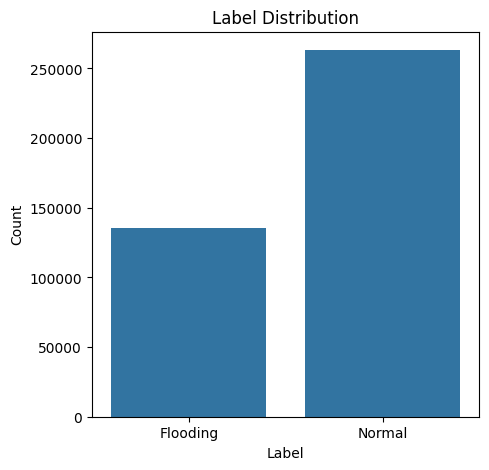

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='category')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [25]:
print(df['category'].value_counts())

category
Normal      263206
Flooding    135576
Name: count, dtype: int64


# Histogram for Transmission Rate and Reception Rate 

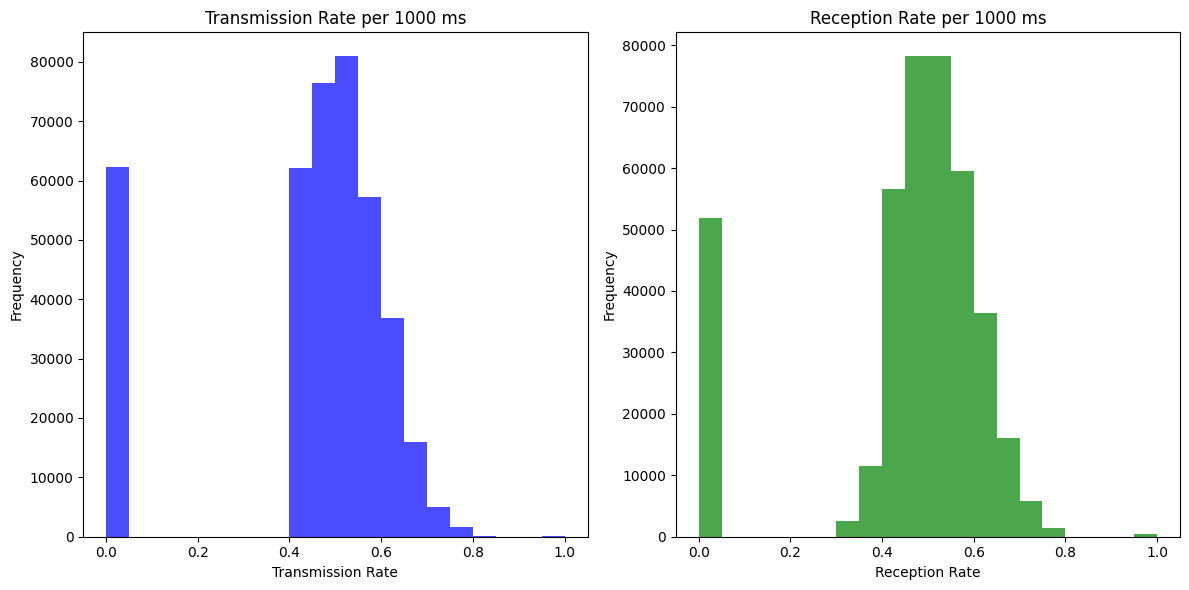

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['transmission_rate_per_1000_ms'], bins=20, color='blue', alpha=0.7)
plt.title("Transmission Rate per 1000 ms")
plt.xlabel("Transmission Rate")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['reception_rate_per_1000_ms'], bins=20, color='green', alpha=0.7)
plt.title("Reception Rate per 1000 ms")
plt.xlabel("Reception Rate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

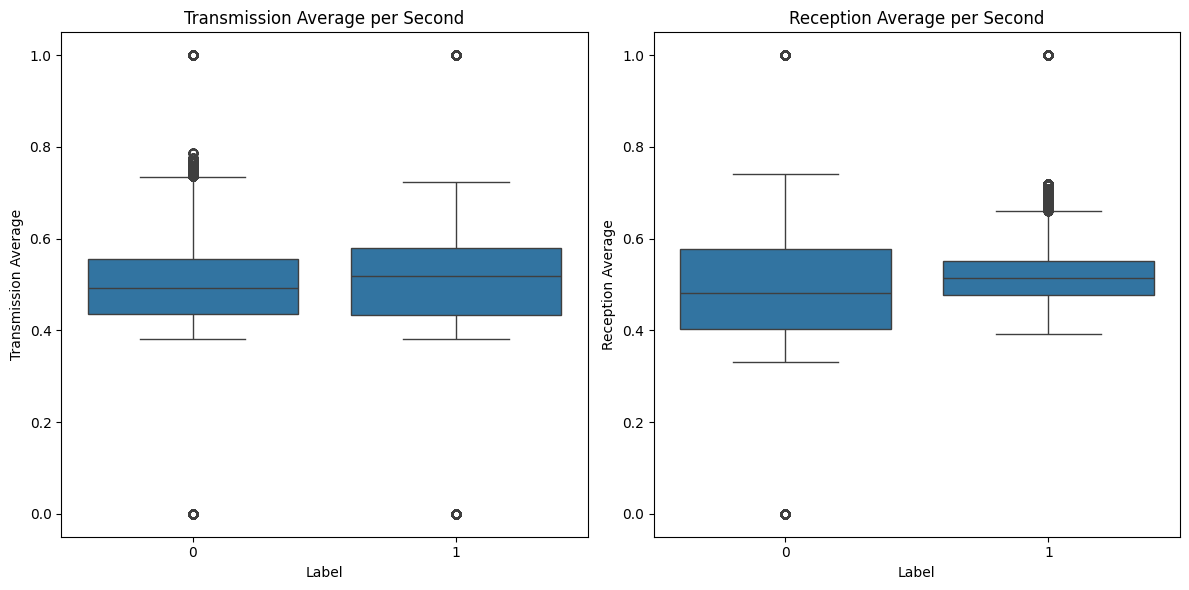

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='label', y='transmission_average_per_sec')
plt.title("Transmission Average per Second")
plt.xlabel("Label")
plt.ylabel("Transmission Average")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='label', y='reception_average_per_sec')
plt.title("Reception Average per Second")
plt.xlabel("Label")
plt.ylabel("Reception Average")

plt.tight_layout()
plt.show()

# Feature Correlation Heatmap

In [28]:
df_corr = df.copy()
df_corr = df_corr.drop(columns=['label', 'category'])
df_corr.head()

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio
0,0.000,39,9999,0.0,1.0,0.455915,0.453760,0.651939,0.602542,0.455513,0.453217,0.647481,1.000000,0.0,0.0,0.505311
1,0.029,39,9999,0.0,1.0,0.546376,0.451854,0.562410,0.574839,0.546240,0.451169,0.639066,0.417750,0.0,0.0,0.602969
2,0.031,39,9999,0.0,1.0,0.477600,0.643320,0.590334,0.550347,0.477600,0.644056,0.495172,0.601483,0.0,0.0,0.672366
3,0.043,39,9999,0.0,1.0,0.449653,0.635719,0.587023,0.513923,0.449515,0.636046,0.452128,0.558999,0.0,0.0,0.666124
4,0.045,39,9999,0.0,1.0,0.554547,0.580181,0.440554,0.520545,0.554830,0.580524,0.422353,0.513192,0.0,0.0,0.698465


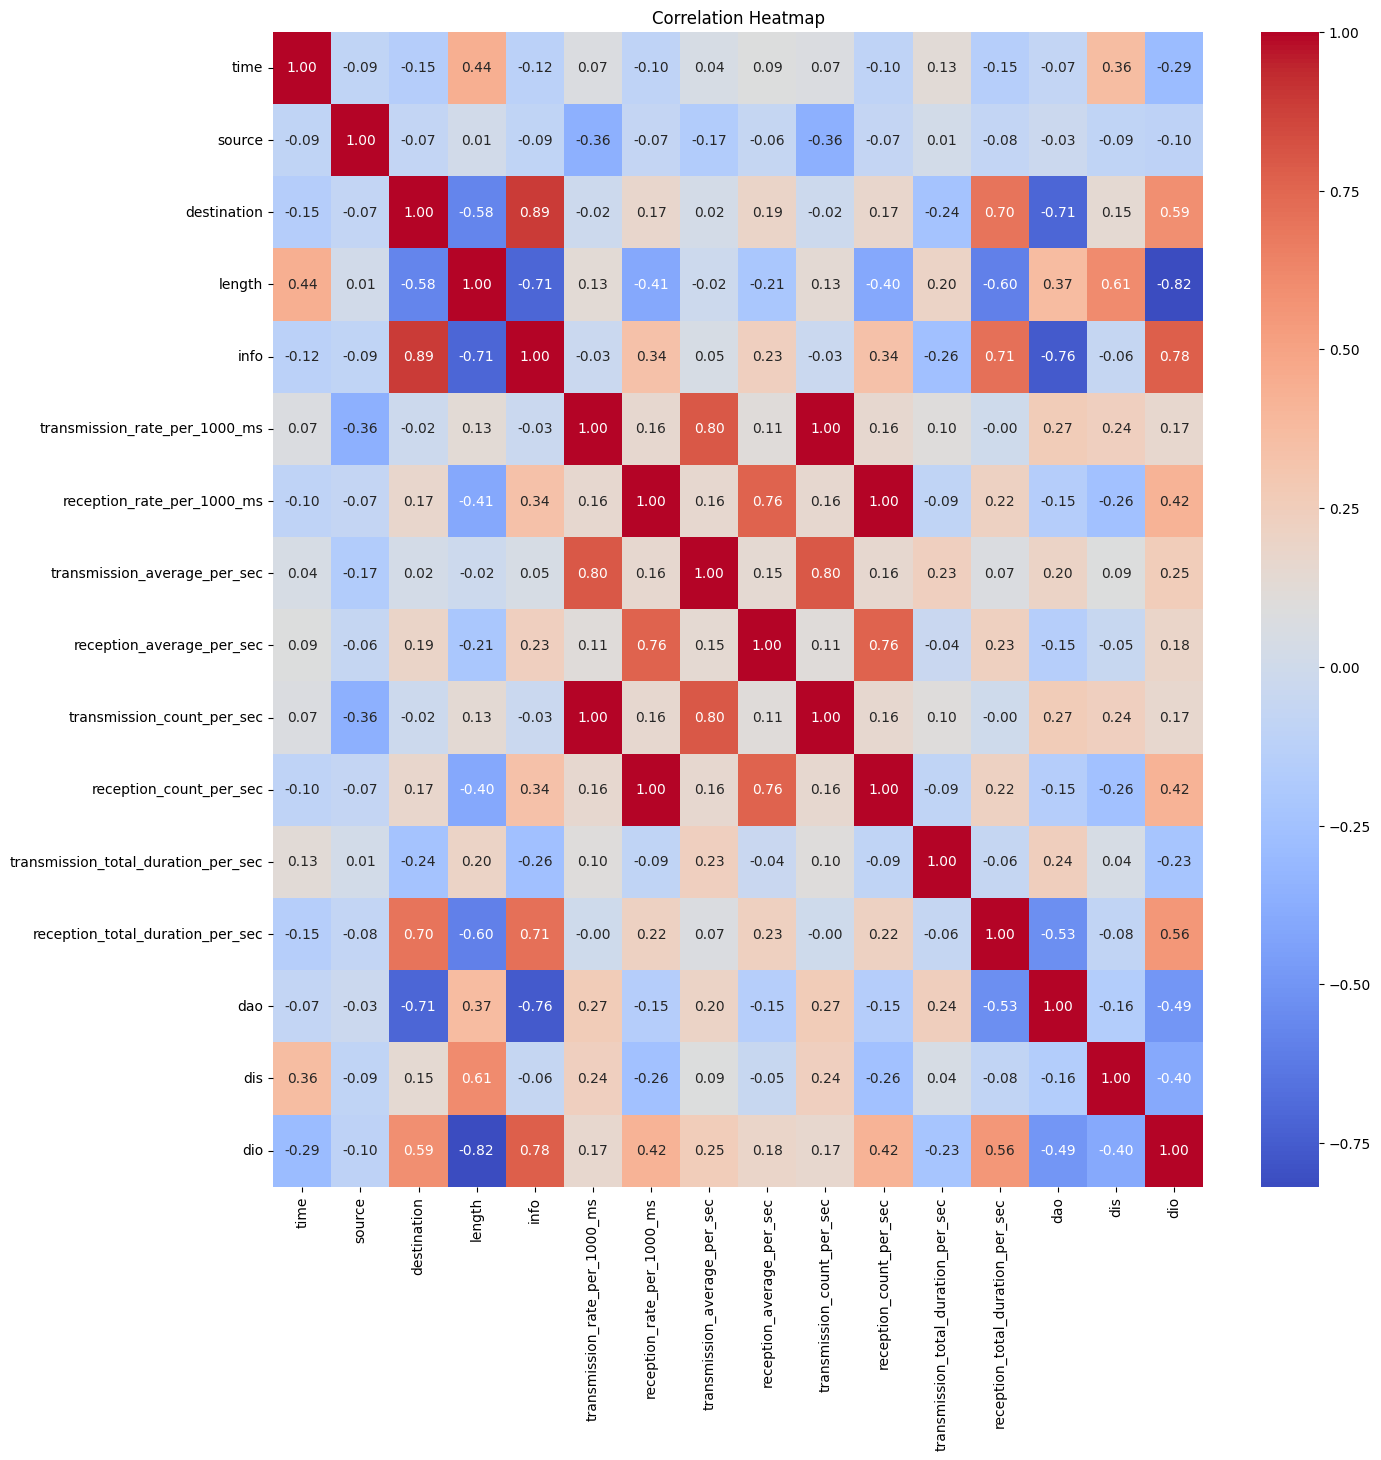

In [29]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing Data

In [30]:
# Check for missing vals
df.isna().sum()

time                                   0
source                                 0
destination                            0
length                                 0
info                                   0
transmission_rate_per_1000_ms          0
reception_rate_per_1000_ms             0
transmission_average_per_sec           0
reception_average_per_sec              0
transmission_count_per_sec             0
reception_count_per_sec                0
transmission_total_duration_per_sec    0
reception_total_duration_per_sec       0
dao                                    0
dis                                    0
dio                                    0
category                               0
label                                  0
dtype: int64

In [31]:
# Checking for class imbalance
len_1 = len(df[df['label'] == 1])
print('Length of flooding values: ',len_1)
len_0 = len(df[df['label'] == 0])
print('Length of normal values: ',len_0)

Length of flooding values:  135576
Length of normal values:  263206


In [32]:
# Normalize data
normalized_dataset = df.copy()
norm_cols = ['length', 'info', 'transmission_rate_per_1000_ms', 'reception_rate_per_1000_ms',
             'transmission_average_per_sec', 'reception_average_per_sec', 'transmission_count_per_sec',
             'reception_count_per_sec', 'transmission_total_duration_per_sec', 'reception_total_duration_per_sec',
             'dao','dis', 'dio']

for column in norm_cols:
    normalized_dataset[column] = normalized_dataset[column] / normalized_dataset[column].abs().max()

# Split data into train and test
x_cols = ['time', 'length', 'info', 'transmission_rate_per_1000_ms', 'reception_rate_per_1000_ms',
          'transmission_average_per_sec', 'reception_average_per_sec', 'transmission_count_per_sec',
          'reception_count_per_sec', 'transmission_total_duration_per_sec', 'reception_total_duration_per_sec', 'dao',
          'dis', 'dio']
X = normalized_dataset[x_cols]
y = normalized_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

counter = Counter(normalized_dataset['label'])
print('Before', counter)
x_train_ada, y_train_ada = ADASYN().fit_resample(X_train, y_train)
post_counter = Counter(y_train_ada)
print('After', post_counter)
preprocessed_data = pd.concat([x_train_ada, y_train_ada], axis=1)
preprocessed_data.to_csv('preprocessed_flooding.csv')
preprocessed_data.head()

Before Counter({0: 263206, 1: 135576})
After Counter({1: 197473, 0: 197390})


,time,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,label
0,382.209,0.463944,0.0,0.000000,0.442162,0.000000,0.544163,0.000000,0.442451,0.521039,0.366214,0.000000,0.0,0.000000,0
1,367.596,0.463944,0.0,0.449653,0.000000,0.552296,0.000000,0.449515,0.000000,0.406967,0.452673,0.525012,0.0,0.000000,0
2,666.616,0.463944,0.0,0.678074,0.606239,0.465106,0.452945,0.678074,0.606685,0.509183,0.446019,0.686032,0.0,0.000000,0
3,640.507,0.000000,1.0,0.412952,0.454705,0.529028,0.601483,0.412405,0.454030,0.374305,1.000000,0.000000,0.0,0.473362,1
4,304.118,0.000000,1.0,0.487660,0.506641,0.517837,0.530040,0.487295,0.506036,0.457251,1.000000,0.000000,0.0,0.534894,1


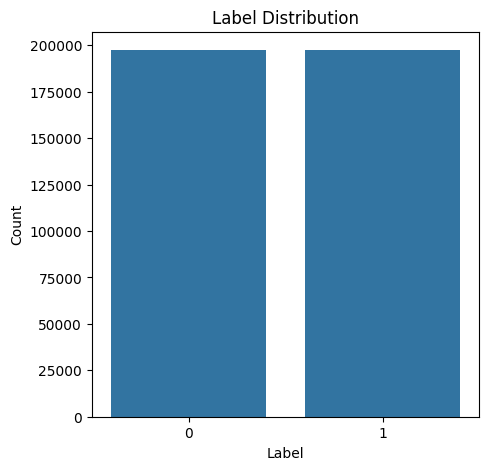

In [33]:
plt.figure(figsize=(5, 5))
sns.countplot(data=preprocessed_data, x='label')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

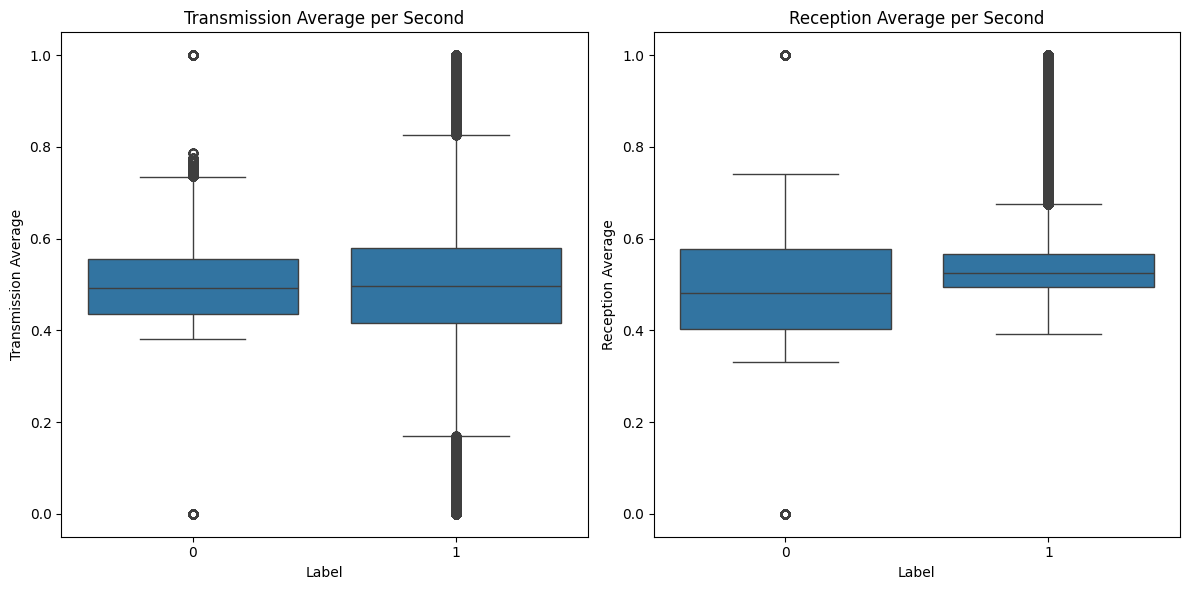

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=preprocessed_data, x='label', y='transmission_average_per_sec')
plt.title("Transmission Average per Second")
plt.xlabel("Label")
plt.ylabel("Transmission Average")

plt.subplot(1, 2, 2)
sns.boxplot(data=preprocessed_data, x='label', y='reception_average_per_sec')
plt.title("Reception Average per Second")
plt.xlabel("Label")
plt.ylabel("Reception Average")

plt.tight_layout()
plt.show()

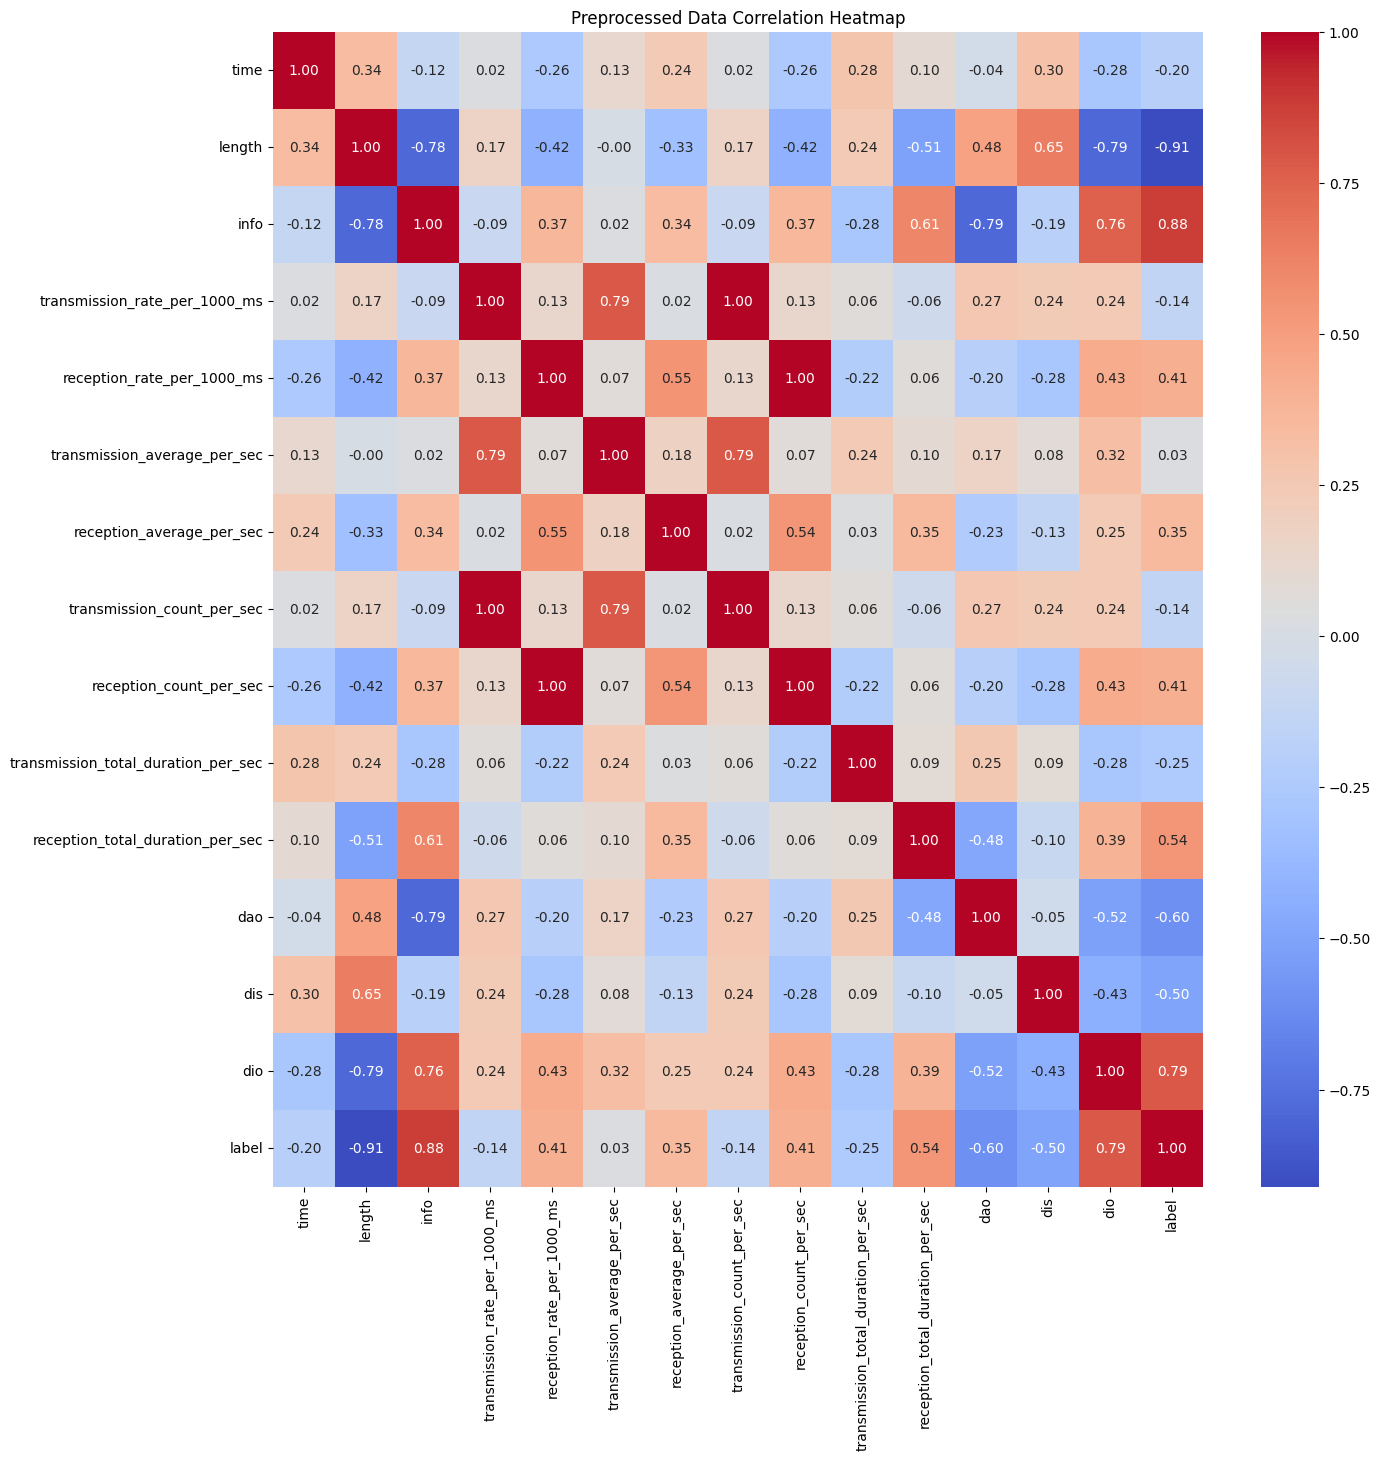

In [35]:
correlation_matrix = preprocessed_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Preprocessed Data Correlation Heatmap")
plt.show()